# K-Nearest-Neighbors

In [6]:
# Data processing
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler


# Modelling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

# Model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt


👇 Load the `houses_clean.csv` dataset located in the `data` folder  
Or you can load it directly from this URL: [https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv).  

The dataset description can be found [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt).

In [7]:
data_path = "data/houses_clean.csv"
data = pd.read_csv(data_path)

💡 Most features are already preprocessed (scaled with normalization), as you did during the Data Preparation day  

💡 One feature, `GrLiveArea`, is not normalized. We keep it that way to see the impact of its normalization on our model performance later on  

👇 You can easily see this with descriptive statistics, check the min and max    

In [8]:
data.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.078410,0.358305,0.348858,0.571918,0.934932,180921.195890
std,0.813952,0.101972,0.073446,0.139100,0.246731,79442.502883
min,-2.263422,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,-0.516802,0.250000,0.333333,0.500000,1.000000,129975.000000
50%,0.000000,0.375000,0.333333,0.500000,1.000000,163000.000000
75%,0.483198,0.375000,0.333333,0.625000,1.000000,214000.000000
max,6.455002,1.000000,1.000000,1.000000,1.000000,755000.000000


In [9]:
data.head(1)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
0,0.38007,0.375,0.333333,0.5,1,208500


# Default KNN

🎯 The task is to predict the price of houses (`SalePrice`) with all the features.

👇 Use cross validation to evaluate a default [KNNRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) on such a task.  
❓ What is the proportion of the variance in `SalePrice` that is explained by the features?  
Save your answer in a variable named `base_knn_score`.

<details>
<summary> 💡 Hint </summary>
    <br>
    ℹ️ The proportion of the variance in the dependent variable that is explained by the independent variables is the R2 score.
</details>

In [10]:
X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]

In [11]:
default_knn_regressor = KNeighborsRegressor()

In [12]:
base_knn_score = cross_val_score(estimator=default_knn_regressor, X=X, y=y).mean()
base_knn_score

0.608370347216843

### 🧪 Check your code

In [13]:
from nbresult import ChallengeResult

result = ChallengeResult('default_score',
                         score = base_knn_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/05-ML/03-Performance-metrics/data-knn/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_default_score.py::TestDefault_score::test_score PASSED              [100%]

============================== 1 passed in 0.21s ===============================


💯 You can commit your code:

git add tests/default_score.pickle

git commit -m 'Completed default_score step'

git push origin master



# Scale sensitivity

KNNs and distance-based algorithms can be extremely sensitive to the scale of the features. 

👇 Rescale the feature set within an **exact common range**, and save it under a variable named `X_rescaled`  
Then, evaluate a model on the rescaled features and save its score under variable name `rescaled_score`.

<details>
<summary> 💡 Hint </summary>
    
`MinMaxScaler()`

Even though only `GrLiveArea` needs to be normalized, using the MinxMaxScaler on all your features is fine  
    
Indeed, Min-Max Scaling is an [idempotent](https://en.wikipedia.org/wiki/Idempotence) transformation: if $X_{max}=1$ and $X_{min}=0$, then $X = \frac{X - X_{min}}{X_{max} - X_{min}}$
</details>


In [14]:
# Initialize a minmax scaler
min_max_scaler = MinMaxScaler().set_output(transform="pandas")

In [15]:
# Fit the scaler on the data
min_max_scaler.fit(X)
# Transform the data
X_rescaled = min_max_scaler.transform(X)
X_rescaled.head(1)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir
0,0.303208,0.375,0.333333,0.5,1.0


In [16]:
rescaled_score = cross_val_score(estimator=default_knn_regressor, X=X_rescaled, y=y).mean()
rescaled_score

0.649893812648999

👉 The R2 score should have increased!

💡 It is preferable for features to be in an exact common range when modeling distance-based algorithms.  
However, it does not always guarantee a better score.  
It is a trial and error process.

### 🧪 Check your code

In [17]:
from nbresult import ChallengeResult

result = ChallengeResult('scale_sensitivity',
                         base_score = base_knn_score,
                         rescaled_features = X_rescaled,
                         rescaled_score = rescaled_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/05-ML/03-Performance-metrics/data-knn/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 2 items

test_scale_sensitivity.py::TestScale_sensitivity::test_rescaled_features PASSED [ 50%]
test_scale_sensitivity.py::TestScale_sensitivity::test_score_inscrease PASSED [100%]

============================== 2 passed in 0.71s ===============================


💯 You can commit your code:

git add tests/scale_sensitivity.pickle

git commit -m 'Completed scale_sensitivity step'

git push origin master



# Optimizing $k$

👇 Fine tune the parameter K (using the parameter `n_neighbors`) of a KNNRegressor on the rescaled features. Plot the evolution of the score as K increases from 1 until 25.

In [18]:
scores = []
for i in range(1, 26):
    knn_regressor = KNeighborsRegressor(n_neighbors=i)
    score = cross_val_score(estimator=knn_regressor, X=X_rescaled, y=y, n_jobs=25).mean()
    scores.append(score)

In [19]:
scores

[0.48715870247173293,
 0.6270720838084496,
 0.6347267925227419,
 0.6426267863682812,
 0.649893812648999,
 0.6523811167606833,
 0.6536947990887542,
 0.6525464446156013,
 0.6552848730485026,
 0.6544988637671422,
 0.6571704043326225,
 0.654763465304942,
 0.6558030941075217,
 0.6532252057650935,
 0.6506016886984801,
 0.6508575824584606,
 0.6488110158122321,
 0.6467115704892066,
 0.6436555020803517,
 0.6428434555179493,
 0.6414491767798636,
 0.6397113414116691,
 0.6380510601646833,
 0.6364033497440389,
 0.6351695905742651]

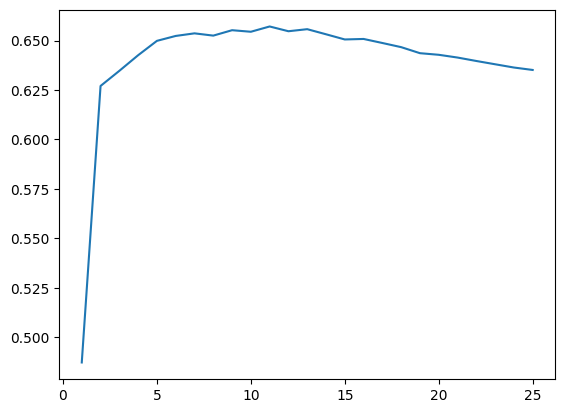

In [20]:
plt.plot(np.arange(1, 26), scores)

❓ Which value of K produces the best performance? Save your answer under variable name `best_k`.

In [21]:
max_score = max(scores)
best_k = scores.index(max_score)

<details>
<summary> 👉 Solution 👈</summary>
    
By looking at your graph, you should see that the score stops increasing around k = 5 and the maximum score is reached for k = 11.

</details>



❓ What is you interpretation of the poor performance of the model for values $k$ < 5?

<details>
<summary> 👉 Solution 👈</summary>
    
When K is too small, the model will tend to overfit to the training set. It will focus on too few points to be able to generalize well. Increasing K will give the model more examples to base its predictions on.

</details>



### 🧪 Check your code

In [22]:
from nbresult import ChallengeResult

result = ChallengeResult('optimal_k',
                         optimal_k = best_k)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/05-ML/03-Performance-metrics/data-knn/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_optimal_k.py::TestOptimal_k::test_optimal_K_around_10 PASSED        [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/optimal_k.pickle

git commit -m 'Completed optimal_k step'

git push origin master



# Overfitting a KNN 

💡 When the parameter K of KNNs is too small, there is a risk of overfitting the training set and not being able to generalize well. 

👇 Plot the learning curves of a KNN with parameter K=2.

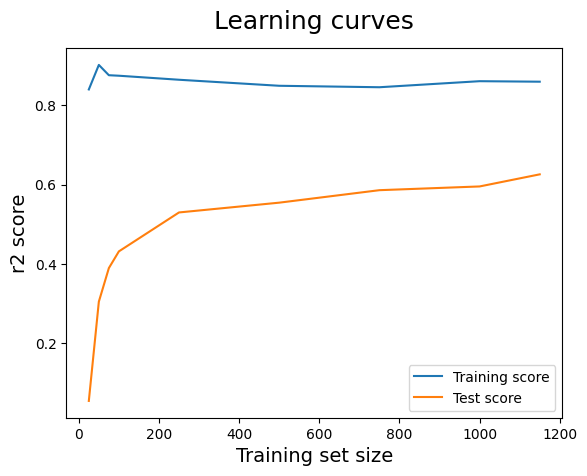

In [23]:

train_sizes = [25, 50, 75, 100, 250, 500, 750, 1000, 1150]

# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=KNeighborsRegressor(n_neighbors=2),
    X=X_rescaled,
    y=y,
    train_sizes=train_sizes,
    cv=5,
)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the scores
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

👉 You should observe a high training score, but a low testing score. ⚠️ Overfitting alert ⚠️ This is due to a parameter K that is too low.

# Ideal K

👇 This time, plot the learning curves for the ideal K value you found in the "Optimizing $k$" section.

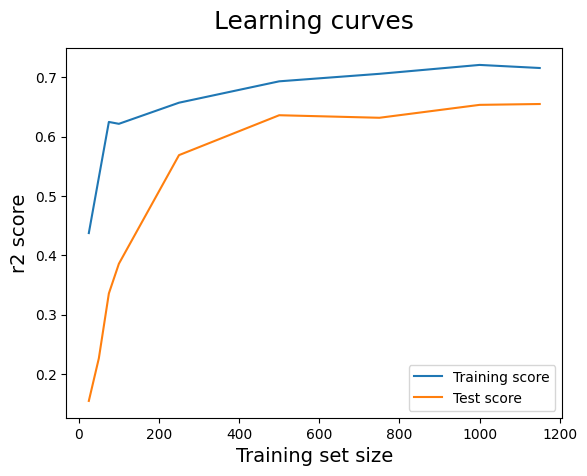

In [24]:

train_sizes = [25, 50, 75, 100, 250, 500, 750, 1000, 1150]

# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=KNeighborsRegressor(n_neighbors=10),
    X=X_rescaled,
    y=y,
    train_sizes=train_sizes,
    cv=5,
)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the scores
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

👉 The curves should be close to converging, which indicates that the model is overfitting less and generalizing better.

💡 There are two key elements to remember when modelling with KNN models:  
    1. Distance-based algorithms are extremely sensitive to the scale of features  
    2. K must be tuned: it controls the tradeoff between performance, generalization, and overfitting

❓ What is the average difference between actual price and predicted price of the optimized KNN model? Compute your answer and save it under variable name `price_error`

<details>
<summary> 💡 Hint </summary>
    
The metric you should calculate is the **Negative Mean Absolute Error (MAE)**.

</details>

In [25]:
knn_regressor_10 = KNeighborsRegressor(n_neighbors=10)

In [26]:
knn_regressor_10.fit(X=X_rescaled, y=y)
predictions = knn_regressor_10.predict(X_rescaled)
price_error = -mean_absolute_error(y, predictions)
price_error


-27473.031643835617

In [35]:
knn_regressor_10 = KNeighborsRegressor(n_neighbors=10)

cv_results = cross_validate(knn_regressor_10, X, y,
                            scoring=['max_error',
                                     'r2',
                                     'neg_mean_absolute_error',
                                     'neg_mean_squared_error']
                           )
pd.DataFrame(cv_results) # Cross validation output
cv_results["test_neg_mean_absolute_error"].mean()

-32455.802808219178

### 🧪 Check your code

In [28]:
from nbresult import ChallengeResult

result = ChallengeResult('price_error',
                         error = price_error)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/05-ML/03-Performance-metrics/data-knn/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_price_error.py::TestPrice_error::test_price_error_range PASSED      [100%]

============================== 1 passed in 0.14s ===============================


💯 You can commit your code:

git add tests/price_error.pickle

git commit -m 'Completed price_error step'

git push origin master



# Model Selection

❓ Which of those two models would you chose to perform the task of predicting house prices:
- The KNN model you just tuned
- A Linear Regression model

Save your answer as a string under variable name `best_model` as either "KNN" or "LinearReg".

<details>
<summary> 💡 Hint </summary>
    
To chose either or, you'll have to evaluate the score of a Linear Regression on the same task and compare it to the score of the KNN. Make sure you are comparing the same metrics!!

</details>




In [29]:
linear_regression = LinearRegression()

In [34]:
cv_results = cross_validate(linear_regression, X, y,
                            scoring=['max_error',
                                     'r2',
                                     'neg_mean_absolute_error',
                                     'neg_mean_squared_error']
                           )
pd.DataFrame(cv_results) # Cross validation output

cv_results["test_neg_mean_absolute_error"].mean()

-33586.169063106405

In [36]:
best_model = "KNN"

💡 When comparing either metric of both models, the KNN model should outperform the Linear Regression. This could be due to its ability to capture non-linear patterns in the data.

### 🧪 Check your code

In [37]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/05-ML/03-Performance-metrics/data-knn/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_best_model.py::TestBest_model::test_best_model PASSED               [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/best_model.pickle

git commit -m 'Completed best_model step'

git push origin master



# 🏁